# Step Six: Transform Time Series

## Table Of Contents
* [Data Versions](#versions)
* [Load Data](#load)
* [Removing Seasonality](#season)
* [Save tables to database](#save)


## <a name="versions"></a>Data Versions

* border_ts_000 - For details, see Code04_Py_PlotTimeSeries
* border_ts_001 - Removed 2019, only three months were present
* border_ts_002 - Removed seasonal component

## <a name="loaddata"></a>Load Data

### Load data from (local) mySQL database

In [1]:
library(RMySQL)

Loading required package: DBI


In [7]:
mydb = dbConnect(MySQL(), user= 'root'
                 , password = 'PASSWORD'
                 , dbname='bordercrossings', host = 'localhost')

rs_save = dbSendQuery(mydb, "select * from border_ts_001")
border_ts_001 = fetch(rs_save, n=-1)

In [8]:
str(border_ts_001)

'data.frame':	564 obs. of  5 variables:
 $ REF_DATE : chr  "1972-01-01 00:00:00" "1972-02-01 00:00:00" "1972-03-01 00:00:00" "1972-04-01 00:00:00" ...
 $ Americans: num  616944 620144 727056 834346 1110105 ...
 $ Canadians: num  810082 764783 908528 1023422 1095222 ...
 $ Year     : num  1972 1972 1972 1972 1972 ...
 $ Month    : num  1 2 3 4 5 6 7 8 9 10 ...


### Set 'REF_DATE' as data time object and index

In [9]:
rownames(border_ts_001) <- border_ts_001$REF_DATE
border_ts_001$REF_DATE <- NULL

head(border_ts_001,5)

,Americans,Canadians,Year,Month
,<dbl>,<dbl>,<dbl>,<dbl>
1972-01-01 00:00:00,616944,810082,1972,1
1972-02-01 00:00:00,620144,764783,1972,2
1972-03-01 00:00:00,727056,908528,1972,3
1972-04-01 00:00:00,834346,1023422,1972,4
1972-05-01 00:00:00,1110105,1095222,1972,5


## <a name="season"></a>Removing Seasonality

Install Packages

In [10]:
# install.packages("forecast")
library("forecast")

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


### Visualize the seasonal component

**Create a time series object**

In [12]:
can_ts_001 <- ts(border_ts_001$Canadians , start = 1972, frequency = 12)
usa_ts_001 <- ts(border_ts_001$Americans , start = 1972, frequency = 12)

**Decompose the time series**

In [30]:
can_ts_001_decompose <- decompose(can_ts_001, "additive")
usa_ts_001_decompose <- decompose(usa_ts_001, "additive")

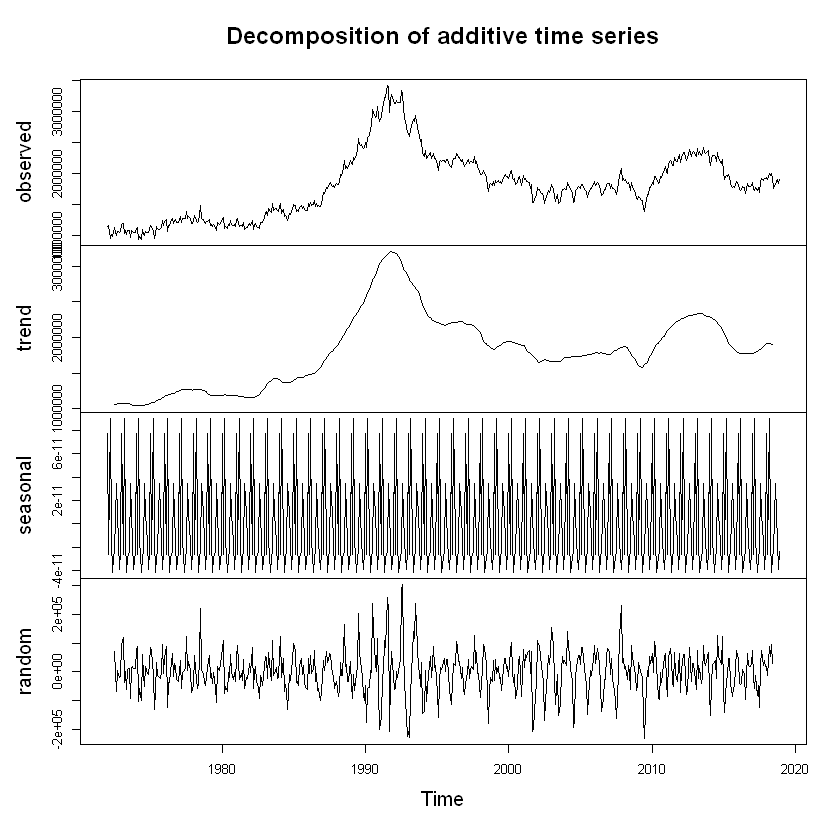

In [31]:
plot(can_ts_001_decompose)

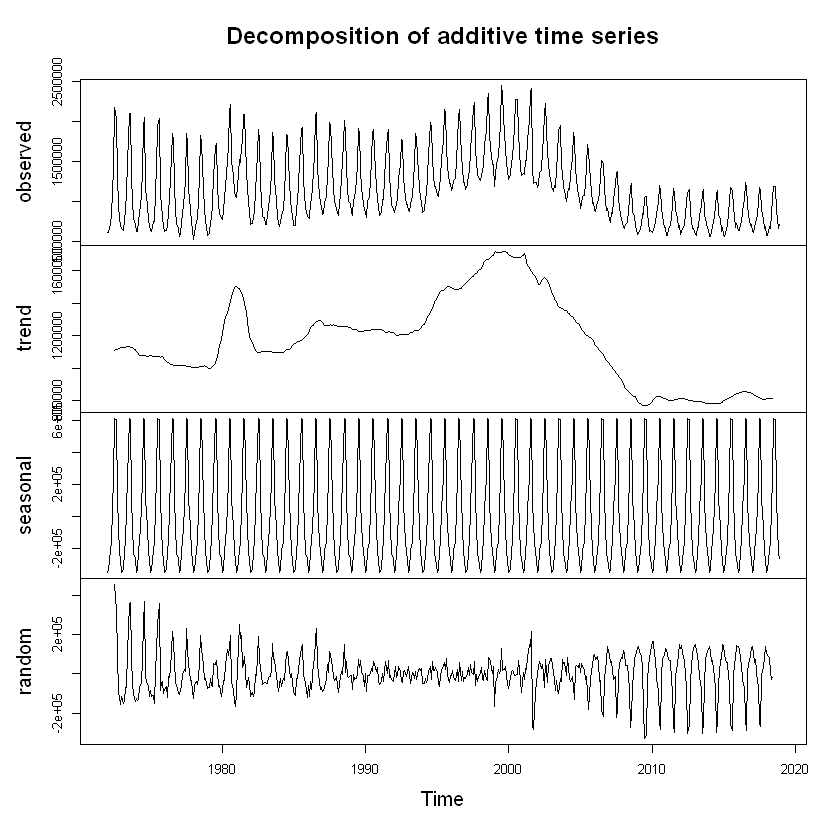

In [23]:
plot(usa_ts_001_decompose)

### Remove Seasonal Signal

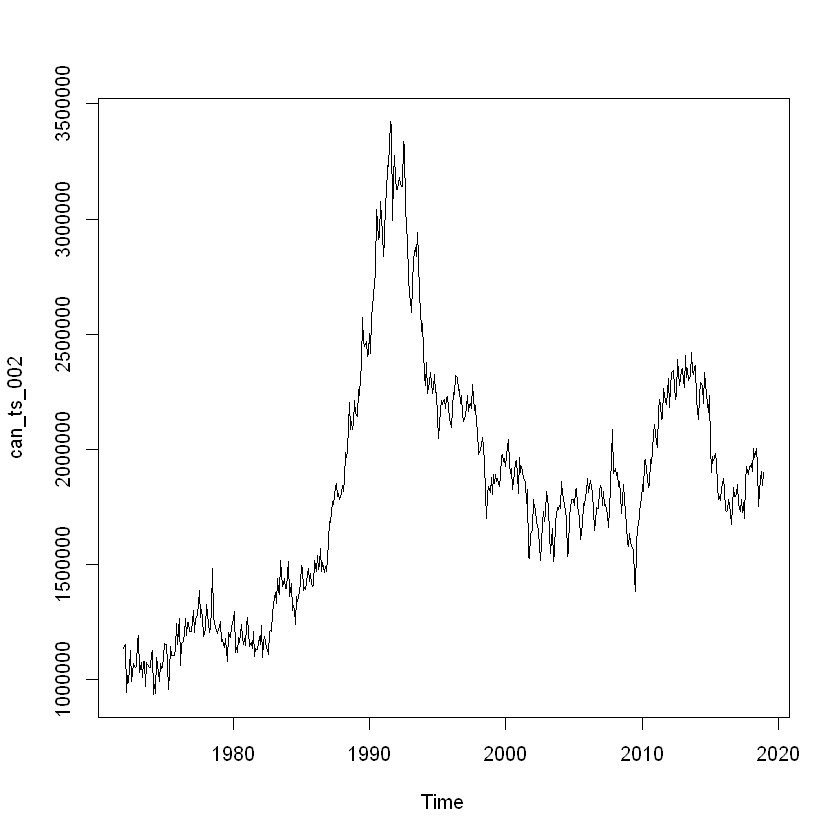

In [28]:
can_ts_002 <- can_ts_001 - can_ts_001_decompose$seasonal

plot(can_ts_002)

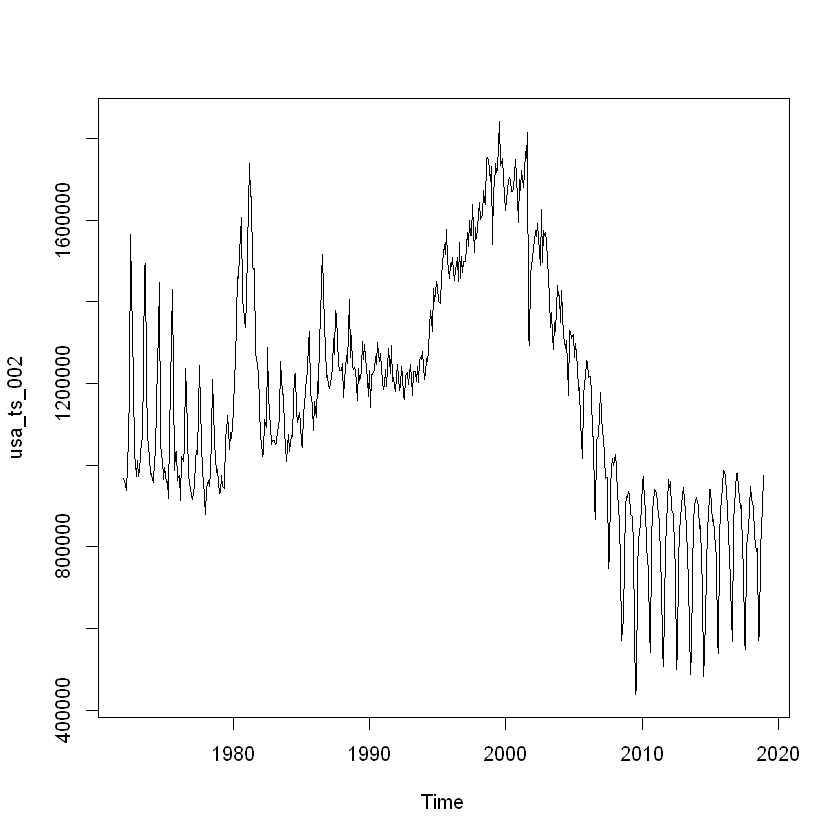

In [29]:
usa_ts_002 <- usa_ts_001 - usa_ts_001_decompose$seasonal

plot(usa_ts_002)

## Create a dataframe for export

In [52]:
border_ts_002 <- border_ts_001
border_ts_002$Americans <- as.matrix(usa_ts_002)
border_ts_002$Canadians <- as.matrix(can_ts_002)

head(border_ts_002,5)

,Americans,Canadians,Year,Month
,"<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1972-01-01 00:00:00,966825.7,1137935.4,1972,1
1972-02-01 00:00:00,953145.0,1155440.4,1972,2
1972-03-01 00:00:00,937173.9,947176.2,1972,3
1972-04-01 00:00:00,998478.5,1019398.8,1972,4
1972-05-01 00:00:00,1061672.9,987797.4,1972,5


## <a name="save"></a>Save table to local mySQL database

In [53]:
mydb = dbConnect(MySQL(), user= 'root'
                 , password = 'PASSWORD'
                 , dbname='bordercrossings', host = 'localhost')

# overwrite will create a new table; append will add rows to an existing
dbWriteTable(mydb, name='border_ts_002', value=border_ts_002 # value is database table
             , overwrite = TRUE, append = FALSE)

[1] TRUE